In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

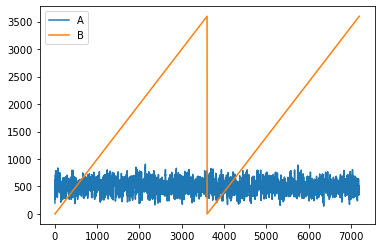

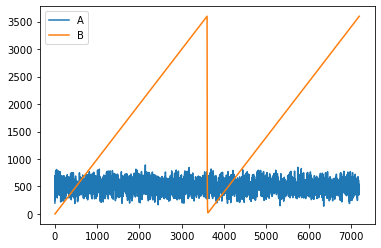

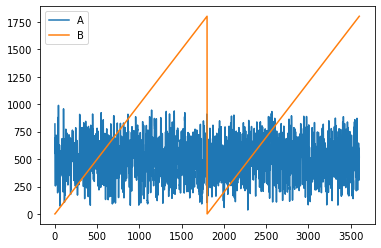

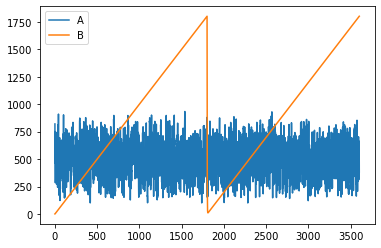

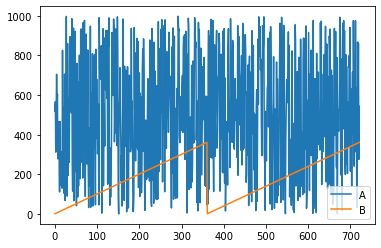

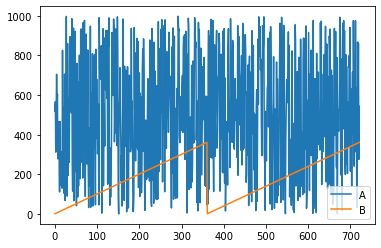

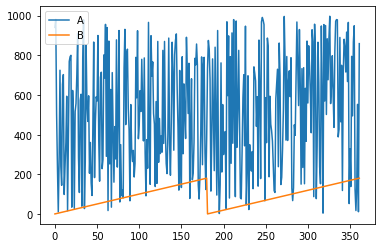

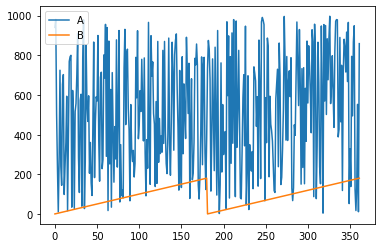

In [186]:
time = ["500L", "1S", "5S", "10S"]
vtime = [0.5, 1, 5, 10]
df = []
for i in range(len(time)):
    tm_rng1 = pd.date_range('2020-07-31 21:00', '2020-07-31 21:30', freq=time[i])
    tm_rng2 = pd.date_range('2020-08-01 09:00', '2020-08-01 09:30', freq=time[i])
    tm_df1 = pd.DataFrame({'A': np.random.randint(0, high=1000, size=tm_rng1.size), 'B': [i + 1 for i in range(tm_rng1.size)]}, index=tm_rng1)
    tm_df2 = pd.DataFrame({'A': np.random.randint(0, high=1000, size=tm_rng2.size), 'B': [i + 1 for i in range(tm_rng2.size)]}, index=tm_rng2)
    tm_df = pd.concat([tm_df1, tm_df2],axis=0)

    window_len = np.ceil(3 / vtime[i])
    tm_df.rolling('3s').mean().reset_index(drop=True).plot()
    tm_df.ewm(span=window_len).mean().reset_index(drop=True).plot()
    df.append(tm_df)

In [187]:
for i in range(len(time)):
    tmp = df[i]['A'].iloc[1] - df[i]['A'].iloc[0]
    plus = df[i]['A'].iloc[1] > df[i]['A'].iloc[0]
    l = [np.nan, tmp]
    for row in range(2, len(df[i])):
        if (df[i]['A'].iloc[row] == df[i]['A'].iloc[row - 1]):
            l.append(0)
            continue
        num = df[i]['A'].iloc[row] - df[i]['A'].iloc[row - 1]
        if ((df[i]['A'].iloc[row] > df[i]['A'].iloc[row - 1]) == plus):
            tmp += num
        else:
            tmp = num
            plus = df[i]['A'].iloc[row] > df[i]['A'].iloc[row - 1]
        l.append(tmp)
    df[i]['flip'] = l

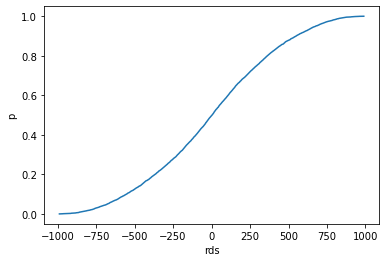

0.6645376284365454


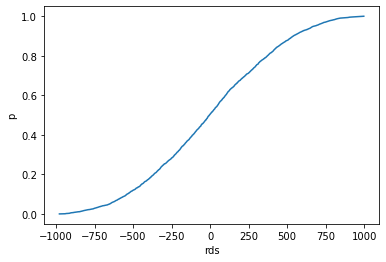

0.6676846196557468


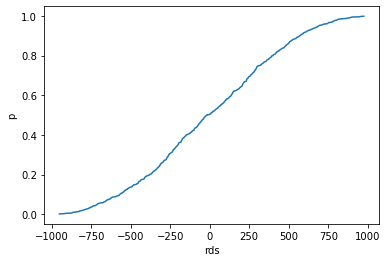

0.6952908587257618


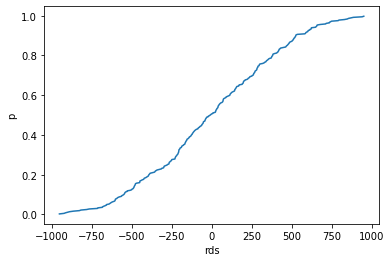

0.6519337016574586


In [188]:
df_num = []
for i in range(len(time)):
    item = df[i]['A'].rolling('20s')
    tmp_df = pd.DataFrame({'median': item.median(), 'mean': item.mean(), 'max': item.max(), 'min': item.min()})
    df_num.append(tmp_df)

    sub = df[i]['A'].shift(-1) - df[i]['A']

    data = sub.reset_index()['A']
    data = pd.Series(data)
    fre = data.value_counts()
    fre_sort = fre.sort_index(axis=0, ascending=True)
    fre_df = fre_sort.reset_index()
    fre_df['A'] = fre_df['A'] / len(sub)
    fre_df.columns = ['rds','fre']
    fre_df['cumsum'] = np.cumsum(fre_df['fre'])
    plot = plt.figure()
    ax1 = plot.add_subplot(1,1,1)
    ax1.plot(fre_df['rds'], fre_df['cumsum'])
    ax1.set_xlabel("rds")
    ax1.set_ylabel("p")
    plt.show()

    count = 0
    for row in range(len(sub)):
        if (df[i]['flip'].iloc[row] > 0 and sub.iloc[row] < 0) or (df[i]['flip'].iloc[row] < 0 and sub.iloc[row] > 0):
            count += 1
    print(count / len(sub))